In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Weddell_Extent = pd.read_excel(filepath, sheet_name='Weddell-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Weddell_Extent)
fp.date_time(Weddell_Extent)

Extent       Date
0    2136510.859 1979-01-01
1    1243495.891 1979-02-01
2    1699053.449 1979-03-01
3    2617442.085 1979-04-01
4    3852934.206 1979-05-01
..           ...        ...
533  3668127.143 2023-06-01
534  4805519.784 2023-07-01
535  5524445.234 2023-08-01
536  6006669.861 2023-09-01
537  5507961.583 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Weddell_Extent['Extent'] = scaler.fit_transform(Weddell_Extent['Extent'].values.reshape(-1, 1))

In [6]:
extent = Weddell_Extent['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [7]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(InputLayer((W_S, 1)))
model.add(Bidirectional(LSTM(128, activation='relu', kernel_constraint=MaxNorm(1.0), return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, activation='relu', kernel_constraint=MaxNorm(1.0), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32, activation='relu', kernel_constraint=MaxNorm(1.0))))
model.add(Dense(1, activation='linear'))

cp = ModelCheckpoint('Weddell_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [10]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
53/53 [==============================] - 39s 524ms/step - loss: 0.2987 - root_mean_squared_error: 0.5465 - val_loss: 0.2002 - val_root_mean_squared_error: 0.4474
Epoch 2/50
53/53 [==============================] - 28s 541ms/step - loss: 0.1298 - root_mean_squared_error: 0.3603 - val_loss: 0.0948 - val_root_mean_squared_error: 0.3079
Epoch 3/50
53/53 [==============================] - 27s 519ms/step - loss: 0.0878 - root_mean_squared_error: 0.2964 - val_loss: 0.0786 - val_root_mean_squared_error: 0.2804
Epoch 4/50
53/53 [==============================] - 26s 504ms/step - loss: 0.0761 - root_mean_squared_error: 0.2758 - val_loss: 0.0720 - val_root_mean_squared_error: 0.2683
Epoch 5/50
53/53 [==============================] - 26s 506ms/step - loss: 0.0596 - root_mean_squared_error: 0.2441 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2200
Epoch 6/50
53/53 [==============================] - 27s 511ms/step - loss: 0.0393 - root_mean_squared_error: 0.1983 - val_loss: 0.0270 

Epoch 31/50
53/53 [==============================] - 27s 516ms/step - loss: 0.0055 - root_mean_squared_error: 0.0740 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0572
Epoch 32/50
53/53 [==============================] - 4s 76ms/step - loss: 0.0045 - root_mean_squared_error: 0.0671 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628
Epoch 33/50
53/53 [==============================] - 4s 82ms/step - loss: 0.0048 - root_mean_squared_error: 0.0696 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 34/50
53/53 [==============================] - 28s 529ms/step - loss: 0.0046 - root_mean_squared_error: 0.0680 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0558
Epoch 35/50
53/53 [==============================] - 27s 525ms/step - loss: 0.0045 - root_mean_squared_error: 0.0673 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0533
Epoch 36/50
53/53 [==============================] - 3s 63ms/step - loss: 0.0046 - root_mean_squared_error: 0.0681 - val_loss: 0.0033 

In [11]:
time = (etime - stime)/60
print(f'{time} minutes')

12.889965105056763 minutes


In [12]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

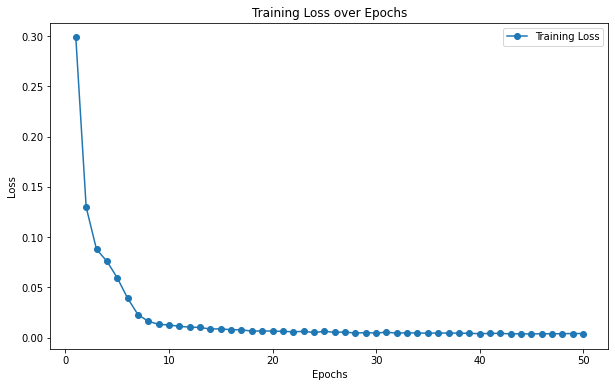

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

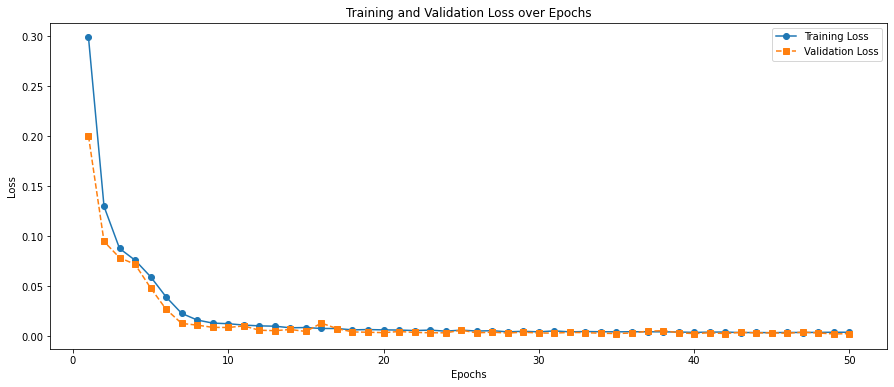

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
model1 = load_model('Weddell_model/')

In [9]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 2s 24ms/step


In [10]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.043150048931041414
MAE : 0.035747597367023154


In [11]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0        3.210875e+06    2787848.748
1        4.299675e+06    4544849.638
2        5.419746e+06    5882741.038
3        6.081028e+06    6574288.749
4        6.411759e+06    6669726.076
5        6.322817e+06    6516136.854
6        5.622343e+06    5902163.675
7        3.647983e+06    3498103.449
8        1.514723e+06    1633675.726
9        9.365024e+05    1292668.399
10       1.115266e+06    1527666.815
11       1.980256e+06    2121949.701
12       3.305786e+06    3562381.775
13       4.782615e+06    5004305.983
14       5.830504e+06    6176613.878
15       6.443588e+06    6794233.093
16       6.694684e+06    7024136.637
17       6.551880e+06    6554271.388
18       5.775428e+06    6172281.701
19       3.572528e+06    4175225.799
20       1.540292e+06    1748380.899
21       1.012744e+06    1256191.080
22       1.218281e+06    1347295.364
23       2.084533e+06    2180184.677
24       3.465692e+06    3419295.982
25       4.824434e+06    4786146.771
26       5.848144e+06    5968132.718
27       6.433217e+06    6556934.174
28       6.688277e+06    6614949.980
29       6.498437e+06    6035207.368
30       5.790150e+06    5274244.730
31       3.951965e+06    3505146.372
32       1.440824e+06    1478130.228
33       9.463384e+05    1096780.503
34       1.246710e+06    1387234.069
35       2.267481e+06    2128693.591
36       3.577377e+06    3313318.704
37       4.769280e+06    4218076.656
38       5.588692e+06    5257641.941
39       6.035988e+06    5956603.340
40       6.193012e+06    6256062.049
41       6.035298e+06    5974548.305
42       5.376238e+06    5569396.731
43       3.711974e+06    3684108.410
44       1.556828e+06    1451614.707
45       9.886231e+05    1089888.684
46       1.190944e+06    1255222.909
47       2.036120e+06    1704492.279
48       3.148556e+06    2563551.804
49       4.138651e+06    3668127.143
50       5.072495e+06    4805519.784
51       5.714889e+06    5524445.234
52       5.985054e+06    6006669.861
53       5.980740e+06    5507961.583

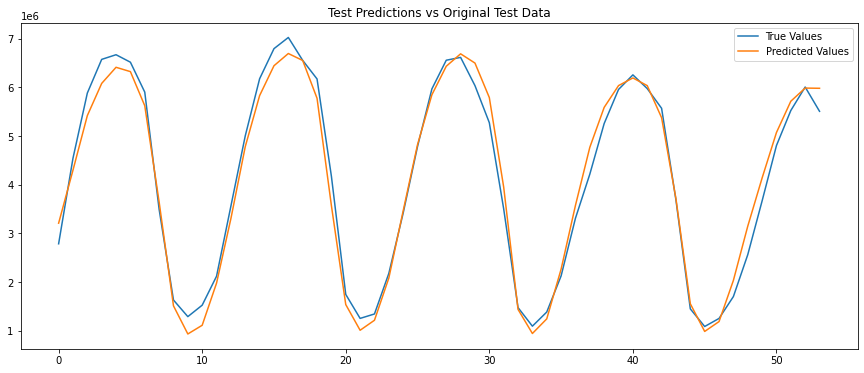

In [13]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [14]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 16ms/step


In [17]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

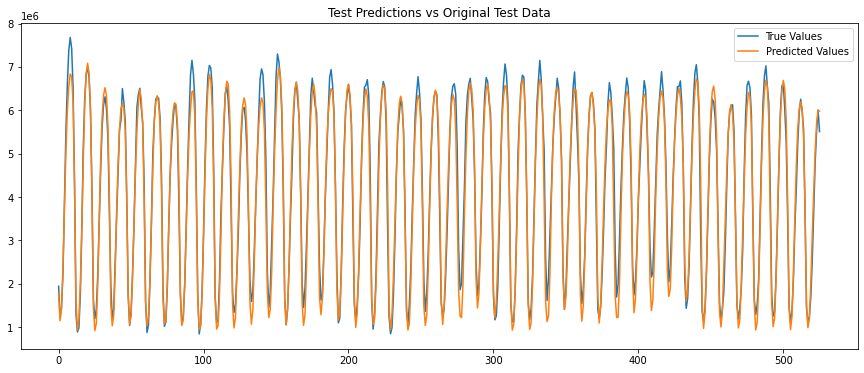

In [18]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()